In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
deliveries = pd.read_csv('data/deliveries.csv')
matches = pd.read_csv('data/matches.csv')

In [308]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [309]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [310]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [311]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [312]:
print(matches['season'].unique())
print(matches['winner'].value_counts())

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]
winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64


<Axes: >

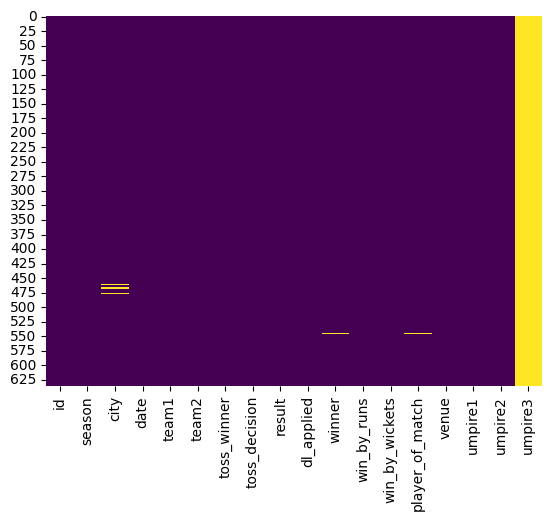

In [313]:
sns.heatmap(matches.isnull(),cbar=False,cmap='viridis')

In [314]:
# data clinging
matches['winner'].fillna('No Result',inplace=True)
matches['city'].fillna(matches['city'].mode()[0],inplace=True)
matches['player_of_match'].fillna('Unknown',inplace=True)
matches['umpire1'].fillna(matches['umpire1'].mode()[0],inplace=True)
matches['umpire2'].fillna(matches['umpire2'].mode()[0],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14884\2439701875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna('No Result',inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14884\2439701875.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [315]:
matches.rename(columns={'team1':'Team1','team2':'Team2'},inplace=True) # rename column

In [316]:
matches.drop(columns=['umpire3'],inplace=True) # drop extra column

In [317]:
matches.isnull().sum() # check to data set is null

id                 0
season             0
city               0
date               0
Team1              0
Team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [318]:
season =  matches['season'].value_counts().sort_index()
season # check which season is heightest matche's play 

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: count, dtype: int64

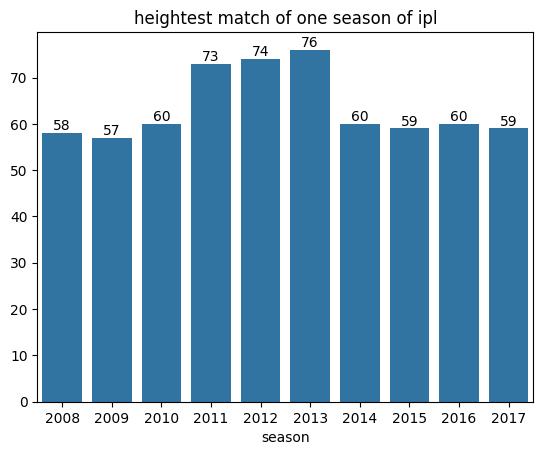

In [319]:
ax = sns.barplot(x=season.index,y=season.values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('heightest match of one season of ipl')
plt.show()

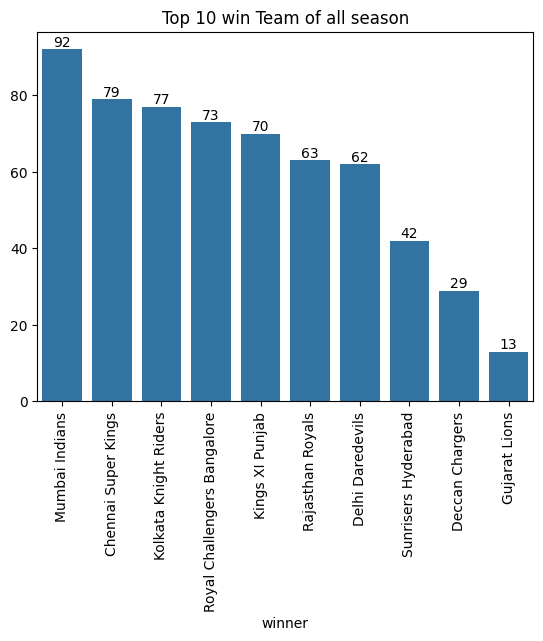

In [320]:
ax = sns.barplot(x=matches['winner'].value_counts().head(10).index,y=matches['winner'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('Top 10 win Team of all season')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [321]:
toss_decision = matches['toss_decision'].value_counts()
toss_decision

toss_decision
field    363
bat      273
Name: count, dtype: int64

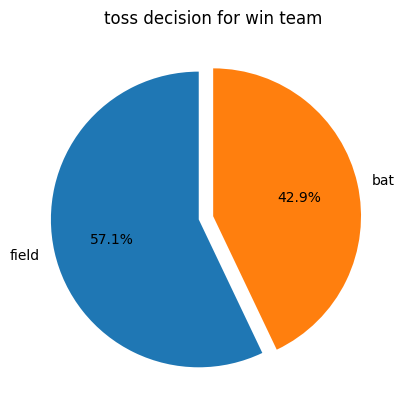

In [322]:
plt.pie(toss_decision,autopct="%1.1f%%",startangle=90,labels=toss_decision.index,explode=(0.1,0))
plt.title('toss decision for win team')
plt.show()

In [380]:
# Winning % while batting first vs chasing


# Total matches where a team batted first and won
bat_first_wins = matches[matches['win_by_runs'] > 0].shape[0]
# Total matches where a team chased and won
chase_wins = matches[matches['win_by_wickets'] > 0].shape[0]

# Total valid matches (exclude ties/no result)
total_valid_matches = bat_first_wins + chase_wins

In [381]:
bat_first_pct = (bat_first_wins / total_valid_matches) * 100
chase_pct = (chase_wins / total_valid_matches) * 100

print(f"Batting First Wins: {bat_first_pct:.2f}%")
print(f"Chasing Wins: {chase_pct:.2f}%")

Batting First Wins: 45.85%
Chasing Wins: 54.15%


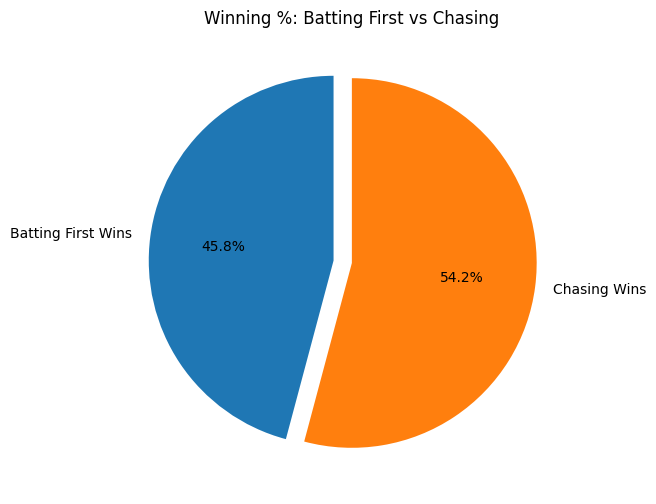

In [395]:
labels = ['Batting First Wins', 'Chasing Wins']
values = [bat_first_pct, chase_pct]

plt.figure(figsize=(6,6))
plt.pie(values,labels=labels,explode=(0.1,0),startangle=90,autopct='%1.1f%%')
plt.title('Winning %: Batting First vs Chasing')
plt.show()

In [358]:
matches.head()

,id,season,city,date,Team1,Team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel


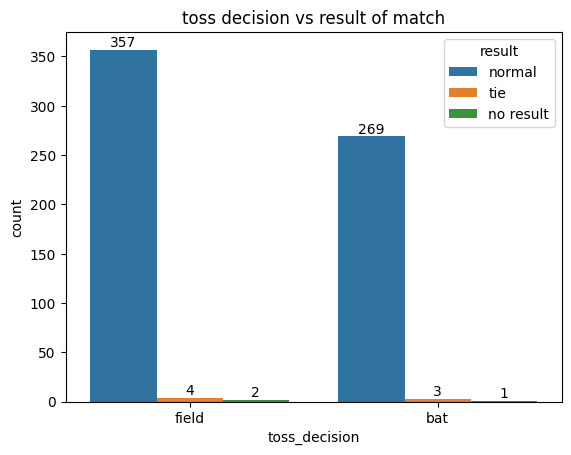

In [323]:
## toss decision vs result of match
ax = sns.countplot(data=matches,x='toss_decision',hue='result')
for i in ax.containers:
    ax.bar_label(i)
plt.title('toss decision vs result of match')
plt.show()

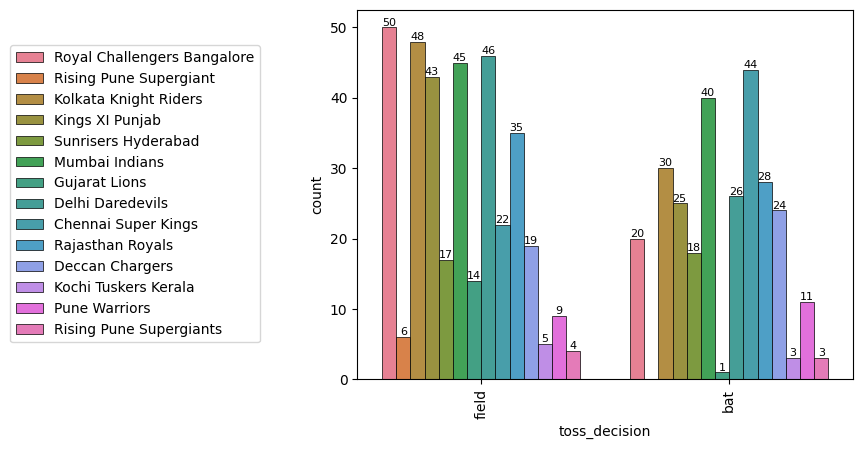

In [324]:
## toss decision vs winner team
ax = sns.countplot(data=matches,x='toss_decision',hue='toss_winner',edgecolor='black', linewidth=.5)
plt.legend(loc=(-0.7,0.1))
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i,fontsize=8)
plt.show()

In [325]:
toss_win = matches[matches['toss_winner'] == matches['winner']].value_counts()
toss_win_percentage = (len(toss_win) / len(matches)) * 100 
print('Toss Winner also won the match : ',toss_win_percentage)

Toss Winner also won the match :  51.100628930817614


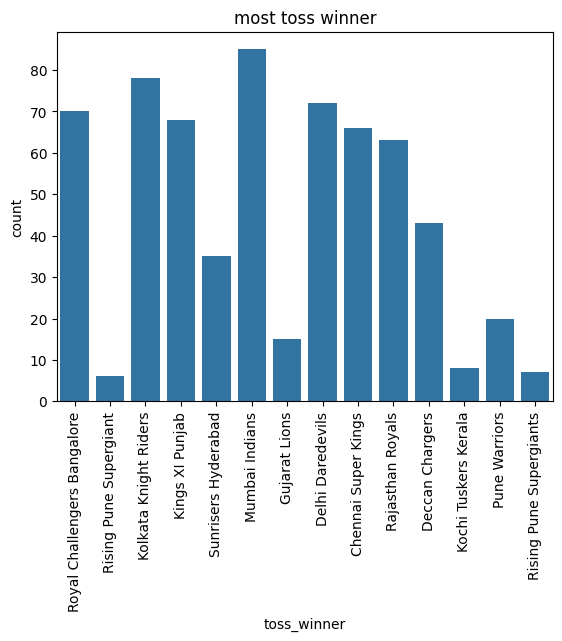

In [326]:
sns.countplot(data=matches,x='toss_winner')
plt.xticks(rotation=90)
plt.title('most toss winner')
plt.show()

In [327]:
# get top 10 players with most Player of the Match awards

top_players = matches['player_of_match'].value_counts().head(10)
top_players

player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: count, dtype: int64

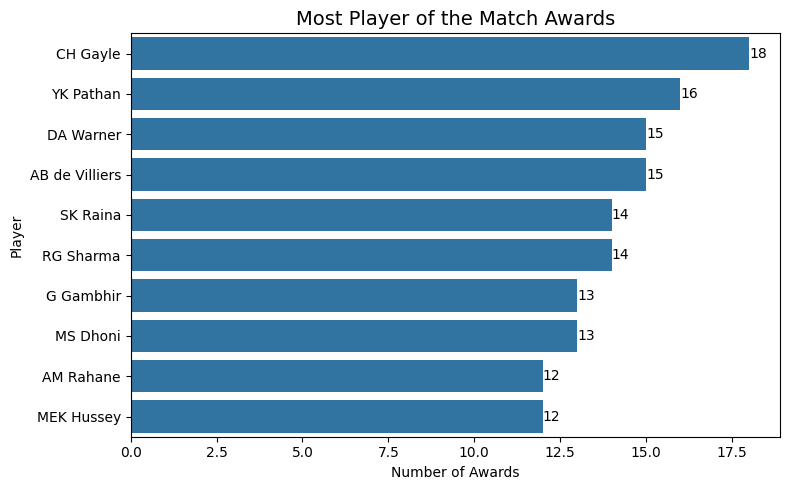

In [328]:
# create barplot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    y=top_players.index, 
    x=top_players.values, 
)

plt.title('Most Player of the Match Awards', fontsize=14)
plt.xlabel('Number of Awards')
plt.ylabel('Player')

# add value labels on bars
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.tight_layout()
plt.show()

In [329]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [330]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

<Axes: >

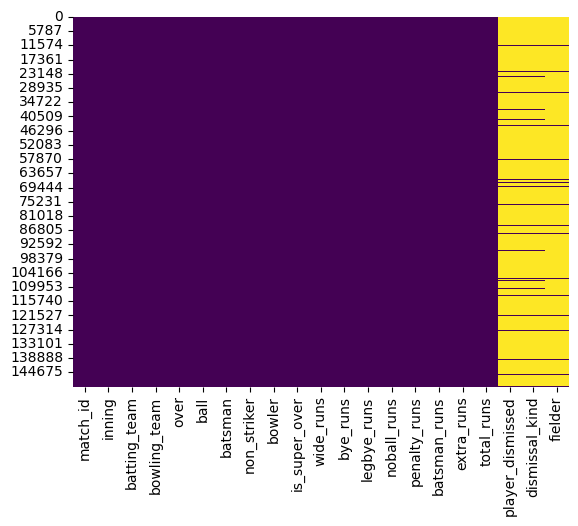

In [331]:
sns.heatmap(data=deliveries.isnull(),cbar=False,cmap='viridis')

In [332]:
# deliveries.drop(columns=['player_dismissed','dismissal_kind','fielder'],inplace=True)

In [333]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [334]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [335]:
# top 10 batsman run
top_batsman = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsman

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

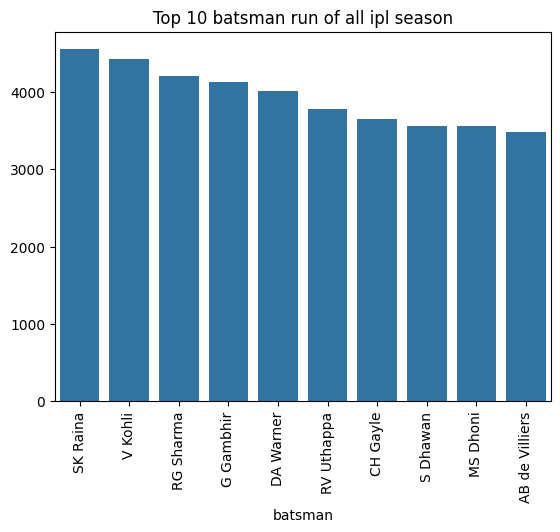

In [336]:
sns.barplot(x=top_batsman.index,y=top_batsman.values)
plt.title('Top 10 batsman run of all ipl season')
plt.xticks(rotation=90)
plt.show()

In [337]:
wickets = deliveries[deliveries['dismissal_kind'].notnull()]
most_wickets = wickets.groupby(['bowler'])['dismissal_kind'].count().sort_values(ascending=False).head(10)
# wickets['dismissal_kind'].value_counts()
most_wickets

bowler
SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
R Vinay Kumar      125
A Nehra            121
Z Khan             119
B Kumar            117
R Ashwin           110
Name: dismissal_kind, dtype: int64

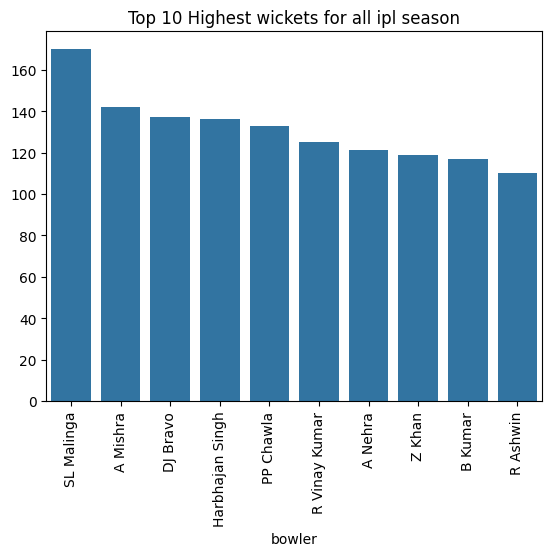

In [338]:
sns.barplot(x=most_wickets.index,y=most_wickets.values)
plt.title('Top 10 Highest wickets for all ipl season')
plt.xticks(rotation=90)
plt.show()

In [339]:
season_run = deliveries.merge(matches[['id','season']],left_on='match_id',right_on='id')
season_run

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,1,2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,1,2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,1,2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,1,2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,2,0,2,NaN,NaN,NaN,636,2016
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,CJ Jordan,run out,NV Ojha,636,2016
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,1,1,NaN,NaN,NaN,636,2016
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,1,0,1,NaN,NaN,NaN,636,2016


In [340]:
season_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [341]:
# most run scoring batsman by season
top_batsman = season_run.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
top_batsman

,batsman,season,batsman_runs
0,A Ashish Reddy,2012,35
1,A Ashish Reddy,2013,125
2,A Ashish Reddy,2015,73
3,A Ashish Reddy,2016,47
4,A Chandila,2012,0
...,...,...,...
1526,Z Khan,2011,21
1527,Z Khan,2012,12
1528,Z Khan,2014,8
1529,Z Khan,2016,6


In [342]:
top_batsman =  top_batsman.loc[top_batsman.groupby('season')['batsman_runs'].idxmax()]
top_batsman

,batsman,season,batsman_runs
1237,SE Marsh,2008,616
834,ML Hayden,2009,572
1306,SR Tendulkar,2010,618
272,CH Gayle,2011,608
273,CH Gayle,2012,733
795,MEK Hussey,2013,733
1142,RV Uthappa,2014,660
324,DA Warner,2015,562
1433,V Kohli,2016,973
326,DA Warner,2017,641


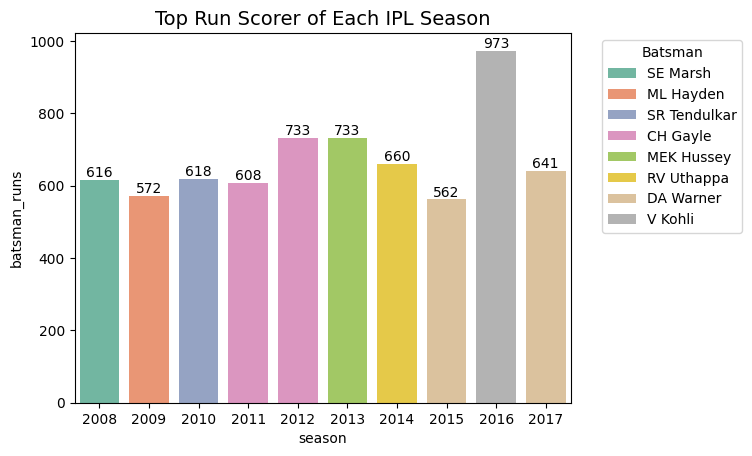

In [343]:
ax = sns.barplot(data=top_batsman,x='season',y='batsman_runs',errorbar=None,hue='batsman',palette="Set2")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Top Run Scorer of Each IPL Season", fontsize=14)
plt.legend(title='Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [344]:
strike_rate = deliveries.groupby('batsman').agg({'batsman_runs':'sum','ball':'count'})
strike_rate['strike_rate'] = (strike_rate['batsman_runs'] / strike_rate['ball']) * 100
strike_rate = strike_rate.sort_values(by='strike_rate',ascending=False).head(10)
strike_rate

,batsman_runs,ball,strike_rate
batsman,,,
DL Chahar,14,6,233.333333
Umar Gul,39,19,205.263158
RS Sodhi,4,2,200.000000
BCJ Cutting,124,70,177.142857
AJ Tye,53,30,176.666667
Shahid Afridi,81,46,176.086957
I Malhotra,7,4,175.000000
SN Khan,177,103,171.844660
CR Brathwaite,95,56,169.642857


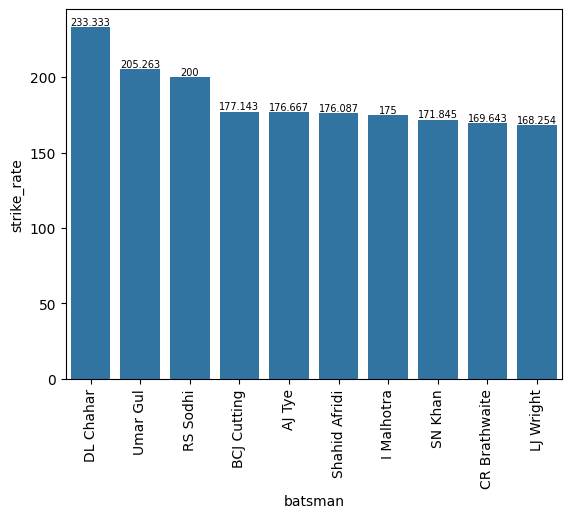

In [345]:
ax = sns.barplot(data=strike_rate,y='strike_rate',x='batsman')
for i in ax.containers:
    ax.bar_label(i,fontsize=7) 
plt.xticks(rotation=90)
plt.show()

In [346]:
most_match_win = matches.groupby(['season','winner'])['winner'].count().sort_values(ascending=False).head(10)
most_match_win ## most win team for all ipl season

season  winner               
2008    Rajasthan Royals         13
2013    Mumbai Indians           13
2014    Kings XI Punjab          12
2013    Chennai Super Kings      12
2012    Kolkata Knight Riders    12
2017    Mumbai Indians           12
2011    Chennai Super Kings      11
2013    Rajasthan Royals         11
2012    Delhi Daredevils         11
2010    Mumbai Indians           11
Name: winner, dtype: int64

In [347]:
matches['toss_winner'].value_counts() ## most toss winner team all ipl season

toss_winner
Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [348]:
matches['venue'].value_counts() ## most select venue's for all ipl season

venue
M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadiu

In [349]:
## most six for batsman all season of ipl
deliveries[deliveries['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10) 

batsman
CH Gayle          266
SK Raina          174
RG Sharma         173
DA Warner         160
V Kohli           160
AB de Villiers    158
MS Dhoni          156
YK Pathan         149
KA Pollard        148
Yuvraj Singh      141
Name: batsman_runs, dtype: int64

In [350]:
## most four of all season 
deliveries[deliveries['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

batsman
G Gambhir     484
SK Raina      402
DA Warner     401
S Dhawan      401
V Kohli       384
RV Uthappa    377
RG Sharma     354
V Sehwag      334
AM Rahane     320
CH Gayle      297
Name: batsman_runs, dtype: int64

In [351]:
deliveries['dismissal_kind'].value_counts() ## dismissal count like how many lbw,bowled et

dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64

In [352]:
## find economy rate of batsman
# filter lagal delevery
legal_deliveries = deliveries[(deliveries['wide_runs'] == 0) & (deliveries['noball_runs'] == 0)]
legal_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [353]:
bowler_stats = legal_deliveries.groupby('bowler').agg({
    'total_runs':'sum',
    'ball':'count'
}).reset_index()
bowler_stats

,bowler,total_runs,ball
0,A Ashish Reddy,388,262
1,A Chandila,245,234
2,A Choudhary,137,101
3,A Flintoff,106,66
4,A Kumble,1050,965
...,...,...,...
351,YA Abdulla,294,209
352,YK Pathan,1378,1129
353,YS Chahal,1558,1191
354,Yuvraj Singh,1056,857


In [354]:
bowler_stats['economy_rate'] = (bowler_stats['total_runs'] / bowler_stats['ball']) * 6
bowler_stats.insert(3,'over',bowler_stats['ball'] / 6)
economy_rate = bowler_stats[bowler_stats['over'] >= 33].sort_values(by='economy_rate').head(10)
economy_rate

,bowler,total_runs,ball,over,economy_rate
318,Sohail Tanvir,255,247,41.166667,6.194332
1,A Chandila,245,234,39.000000,6.282051
300,SP Narine,2042,1931,321.833333,6.344899
234,R Ashwin,2461,2290,381.666667,6.448035
4,A Kumble,1050,965,160.833333,6.528497
103,DW Steyn,2250,2064,344.000000,6.540698
297,SM Pollock,303,276,46.000000,6.586957
108,GD McGrath,360,324,54.000000,6.666667
181,M Muralitharan,1700,1528,254.666667,6.675393
294,SL Malinga,2850,2558,426.333333,6.684910


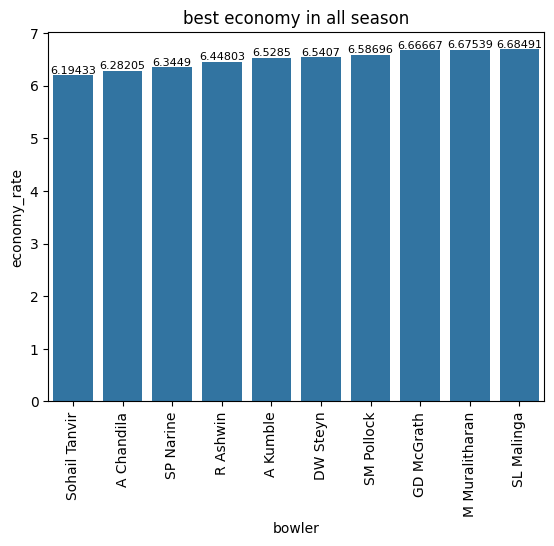

In [355]:
ax = sns.barplot(data=economy_rate,y='economy_rate',x='bowler')
for i in ax.containers:
    ax.bar_label(i,fontsize=8)
plt.title('best economy in all season')
plt.xticks(rotation=90)
plt.show()

In [356]:
# Winning % while batting first vs chasing
matches.head()

,id,season,city,date,Team1,Team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel
